## Experiments with Discrete Cosine Transform

In [6]:
import scipy
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

Image Tensor Shape: (32, 32, 3)


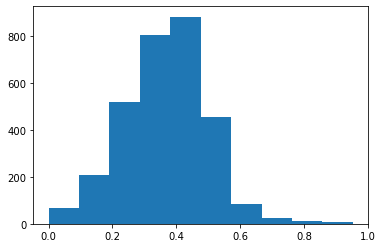

In [7]:
# Load the PNG image using Pillow
image_path = "assets/0_43.jpg"
image = Image.open(image_path)

# Convert the image to a NumPy array (tensor)
img = np.array(image)

# Print the shape of the image tensor
print("Image Tensor Shape:", img.shape)

# Optionally, you can normalize the pixel values to be between 0 and 1
img = img / 255.0

# img = torch.randn(28, 28).flatten()
plt.hist(img.flatten())
plt.show()

In [8]:
import numpy as np
from scipy.fftpack import dct, idct

# Step 1: Create a 3D tensor (image with three color channels)
# image = np.random.rand(28, 28, 3)  # Replace this with your actual image data

# Step 2: Apply 2D DCT to each channel
dct_image = np.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    dct_image[:, :, i] = dct(dct(img[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

# Step 3: Print the transformed image
print("Transformed Image:")
print(dct_image)

# Step 4: Apply the inverse 2D DCT to each channel to get the original image back
original_image = np.zeros_like(img)

for i in range(img.shape[-1]):  # Iterate over color channels
    original_image[:, :, i] = idct(idct(dct_image[:, :, i], axis=0, norm='ortho'), axis=1, norm='ortho')

# Step 5: Print the original image
print("\nOriginal Image:")
print(original_image)

Transformed Image:
[[[ 1.41897059e+01  1.20887255e+01  8.99350490e+00]
  [-9.52662005e-01 -8.92352973e-01 -1.06566319e+00]
  [ 5.02892878e-01  2.58973395e-01 -4.34399787e-01]
  ...
  [-1.04514809e-02  3.25252368e-03 -3.15080256e-02]
  [ 2.16857436e-03  3.99012765e-03  5.65235612e-03]
  [ 3.36625716e-02  2.20804862e-02  6.13398235e-02]]

 [[-6.70909186e-01 -4.82847702e-01 -1.32672011e+00]
  [-8.18225743e-01 -8.85009224e-01 -1.34305729e+00]
  [-1.19499828e-01 -9.16997722e-03  4.54913506e-01]
  ...
  [ 4.94034291e-04  1.71056427e-02  1.24448077e-02]
  [ 3.97555404e-04  7.76903620e-04  1.38218933e-03]
  [ 1.84010619e-02  1.86216656e-03  1.92903345e-03]]

 [[-7.75010652e-01 -2.14459033e-01  2.34303765e-01]
  [ 3.23923591e-01  3.80626549e-01  8.33803521e-01]
  [ 3.01965636e-01  3.29444028e-01  1.48575257e-01]
  ...
  [-7.16183160e-03 -4.58922473e-03 -2.16704219e-02]
  [-5.09199194e-03 -2.59119025e-03 -6.53915546e-03]
  [-9.65937100e-03 -9.52522006e-03  2.21638426e-03]]

 ...

 [[ 6.06145535e

(array([ 67., 209., 520., 807., 883., 456.,  84.,  26.,  14.,   6.]),
 array([0.        , 0.09529412, 0.19058824, 0.28588235, 0.38117647,
        0.47647059, 0.57176471, 0.66705882, 0.76235294, 0.85764706,
        0.95294118]),
 <BarContainer object of 10 artists>)

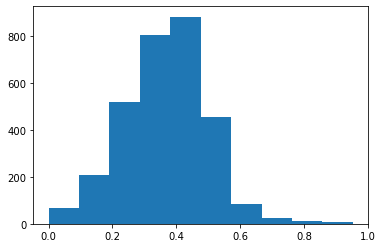

In [9]:
plt.hist(img.flatten())

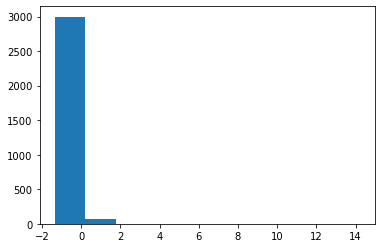

In [10]:
plt.hist(dct_image.flatten())
plt.show()

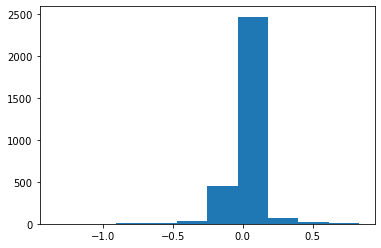

In [11]:
plt.hist(dct_image[dct_image < 1])
plt.show()

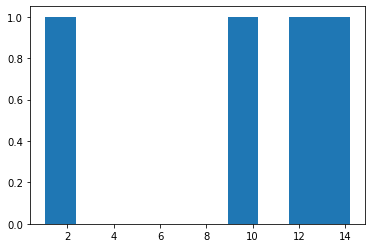

In [12]:
# That's actually a lot of sparsity!
plt.hist(dct_image[dct_image > 1])
plt.show()

## Rotate points by 45°

In [3]:
import numpy as np

In [4]:
data = np.array([[1, 1], [2, 2], [3, 3]])
theta = np.pi / 4
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

rotated_data = np.matmul(data, rotation_matrix)

In [11]:
data

array([[1, 1],
       [2, 2],
       [3, 3]])

In [12]:
rotated_data.round(2)

array([[ 1.41,  0.  ],
       [ 2.83,  0.  ],
       [ 4.24, -0.  ]])